# SeqGAN

–¶–µ–ª–∏:

- –†–∞–∑–æ–±—Ä–∞—Ç—å—Å—è —Å –æ—Å–Ω–æ–≤–Ω—ã–º–∏ –∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–Ω—ã–º–∏ —Ä–µ—à–µ–Ω–∏—è–º–∏ –∏ –∞–ª–≥–æ—Ä–∏—Ç–º–æ–º –æ–±—É—á–µ–Ω–∏—è SeqGAN
- –†–µ–∞–ª–∏–∑–∞—Ü–∏—è SeqGAN –¥–ª—è –∑–∞–¥–∞—á–∏ –ø–æ—Å–∏–º–≤–æ–ª—å–Ω–æ–π –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤

–°–æ–¥–µ—Ä–∂–∞–Ω–∏–µ:

* [–í–≤–µ–¥–µ–Ω–∏–µ](#intro)
* [–ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö](#load_data)
* [–ê–ª–≥–æ—Ä–∏—Ç–º –æ–±—É—á–µ–Ω–∏—è](#algorithm)
  * [–ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä](#generator)
  * [–î–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä](#discriminator)
  * [–ü—Ä–µ–¥–æ–±—É—á–µ–Ω–∏–µ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ (MLE)](#gen_pretrain)
  * [–ü—Ä–µ–¥–æ–±—É—á–µ–Ω–∏–µ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞](#disc_pretrain)
  * [–û–±—É—á–µ–Ω–∏–µ –≤ —Å–æ—Å—Ç—è–∑–∞—Ç–µ–ª—å–Ω–æ–º —Ä–µ–∂–∏–º–µ](#adversarial_train)

–°—Å—ã–ª–∫–∏:

* [SeqGAN: Sequence Generative Adversarial Nets with Policy Gradient. –°—Ç–∞—Ç—å—è –Ω–∞ ArXiv](https://arxiv.org/pdf/1609.05473v6.pdf)
* [Deep Reinforcement Learning: Pong from Pixels](http://karpathy.github.io/2016/05/31/rl/)
* [–†–µ–∞–ª–∏–∑–∞—Ü–∏—è –Ω–∞ pytorch](https://github.com/X-czh/SeqGAN-PyTorch/tree/master)
* [–ê–¥–∞–ø—Ç–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —Ä–µ–∞–ª–∏–∑–∞—Ü–∏—è –∏–∑ —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏—è TextGAN-PyTorch](https://github.com/sswt/dive2gai/blob/main/unit4/seqgan_textgan.py)


<a name="load_data"></a>
## –ó–∞–≥—Ä—É–∑–∫–∞ –¥–∞–Ω–Ω—ã—Ö

In [1]:
import torch
import torch.nn as nn
import torch.nn.functional as F

from time import time
from collections import namedtuple
from sklearn.model_selection import train_test_split

import numpy as np
import matplotlib.pyplot as plt

In [2]:
!wget -q https://huggingface.co/datasets/sswt/arxiv_sample_50K/resolve/main/title_summary_ascii.txt.tar.gz -O data.tar.gz && tar -xzf data.tar.gz

In [3]:
max_len = 32  # default - 128, 32 for debug
with open('title_summary_ascii.txt') as fp:
    lines = [line[:max_len] for line in fp.readlines()]

In [4]:
vocab = {c: i for i, c in enumerate(sorted(set([c for l in lines for c in l])))}
inv_vocab = {i: c for c, i in vocab.items()}
vocab_size = len(vocab)
len(vocab)

67

In [5]:
lines[:3]

[' On Finitely Generated Models of',
 ' Generalized modeling of ecologi',
 ' Generating Subsurface Earth Mod']

In [6]:
''.join(vocab)

" ',.0123456789;ABCDEFGHIJKLMNOPQRSTUVWXYZabcdefghijklmnopqrstuvwxyz"

In [7]:
lines, val_lines = train_test_split(lines, test_size=1024, random_state=42)
len(lines), len(val_lines)

(48976, 1024)

<a name="intro"></a>
## –í–≤–µ–¥–µ–Ω–∏–µ

–í –∫–ª–∞—Å—Å–∏—á–µ—Å–∫–∏—Ö GAN'–∞—Ö –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä —Å—ç–º–ø–ª–∏—Ä—É–µ—Ç —Å–ª—É—á–∞–π–Ω—ã–π –≤–µ–∫—Ç–æ—Ä $z$, –∞ –∑–∞—Ç–µ–º –≤—ã–ø–æ–ª–Ω—è–µ—Ç –¥–µ—Ç–µ—Ä–º–∏–Ω–∏—Ä–æ–≤–∞–Ω–Ω–æ–µ –ø—Ä–µ–æ–±—Ä–∞–∑–æ–≤–∞–Ω–∏–µ –≤ —Å–æ–æ—Ç–≤–µ—Ç—Å—Ç–≤–∏–∏ —Å –µ–≥–æ –≤–µ—Å–∞–º–∏. –î–∞–ª–µ–µ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–π —Å—ç–º–ø–ª –≤–º–µ—Å—Ç–µ —Å –Ω–∞—Å—Ç–æ—è—â–∏–º –ø—Ä–æ–ø—É—Å–∫–∞–µ—Ç—Å—è —á–µ—Ä–µ–∑ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä –∏ –≥—Ä–∞–¥–∏–µ–Ω—Ç —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è, —á—Ç–æ–±—ã –Ω–µ–º–Ω–æ–≥–æ –∏–∑–º–µ–Ω–∏—Ç—å –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º–æ–µ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–æ–º –∑–Ω–∞—á–µ–Ω–∏–µ –∏ –æ–Ω–æ —Å—Ç–∞–ª–æ —á—É—Ç—å –±–æ–ª–µ–µ –ø—Ä–∞–≤–¥–æ–ø–æ–¥–æ–±–Ω—ã–º. –ù–æ –¥–ª—è –¥–∏—Å–∫—Ä–µ—Ç–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤ –Ω–µ–ª—å–∑—è "–Ω–µ–º–Ω–æ–≥–æ" –∏–∑–º–µ–Ω–∏—Ç—å –∑–Ω–∞—á–µ–Ω–∏–µ. –¢–æ –µ—Å—Ç—å –¥–ª—è –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è –º–æ–∂–Ω–æ –∏–∑–º–µ–Ω–∏—Ç—å –ø–∏–∫—Å–µ–ª—å –Ω–∞ 0.0001, –∞ –¥–ª—è —Å–ª–æ–≤–∞ "—Å–ª–æ–≤–æ + 0.0001" –Ω–µ–ø–æ–Ω—è—Ç–Ω–æ —á–µ–º —è–≤–ª—è–µ—Ç—Å—è, –¥–∞–∂–µ –µ—Å–ª–∏ –¥–µ–ª–∞—Ç—å —ç—Ç–æ –≤ –ø—Ä–æ—Å—Ç—Ä–∞–Ω—Å—Ç–≤–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–æ–≤.

–ï—â—ë –æ–¥–∏–Ω –Ω–µ–¥–æ—Å—Ç–∞—Ç–æ–∫ –∑–∞–∫–ª—é—á–∞–µ—Ç—Å—è –≤ —Ç–æ–º, —á—Ç–æ GAN –æ—Ü–µ–Ω–∏–≤–∞–µ—Ç —Ñ—É–Ω–∫—Ü–∏—é –ø–æ—Ç–µ—Ä—å —Ç–æ–ª—å–∫–æ –¥–ª—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ü–µ–ª–∏–∫–æ–º, —Ç–æ –µ—Å—Ç—å –ø–æ—Å–ª–µ —Ç–æ–≥–æ, –∫–∞–∫ –æ–Ω–∞ –ø–æ–ª–Ω–æ—Å—Ç—å—é —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–∞, –∞ —Å–¥–µ–ª–∞—Ç—å —ç—Ç–æ –≤ –ø—Ä–æ—Ü–µ—Å—Å–µ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –¥–ª—è GAN –Ω–µ —Ç–∞–∫ –ø—Ä–æ—Å—Ç–æ.

–í SeqGAN –ø—Ä–æ—Ü–µ—Å—Å –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Ä–∞—Å—Å–º–∞—Ç—Ä–∏–≤–∞–µ—Ç—Å—è –∫–∞–∫ –ø—Ä–æ—Ü–µ—Å—Å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ–≥–æ –ø—Ä–∏–Ω—è—Ç–∏—è —Ä–µ—à–µ–Ω–∏–π, –∫–∞–∫ –≤ –æ–±—É—á–µ–Ω–∏–∏ —Å –ø–æ–¥–∫—Ä–µ–ø–ª–µ–Ω–∏–µ–º (reinforcement learning). –û—Å–Ω–æ–≤–Ω–∞—è –∏–¥–µ—è –æ–±—É—á–µ–Ω–∏—è —Å –ø–æ–¥–∫—Ä–µ–ø–ª–µ–Ω–∏–µ–º —Å–æ—Å—Ç–æ–∏—Ç –≤ —Ç–æ–º, —á—Ç–æ –∞–≥–µ–Ω—Ç –Ω–∞—Ö–æ–¥—è—Å—å –≤ –∫–∞–∫–æ–º-—Ç–æ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ –≤–∑–∞–∏–º–æ–¥–µ–π—Å—Ç–≤—É–µ—Ç —Å –æ–∫—Ä—É–∂–∞—é—â–µ–π —Å—Ä–µ–¥–æ–π, –ø—Ä–µ–¥–ø—Ä–∏–Ω–∏–º–∞—è –¥–µ–π—Å—Ç–≤–∏—è –∏ –ø–µ—Ä–µ—Ö–æ–¥—è –≤ –Ω–æ–≤—ã–µ —Å–æ—Å—Ç–æ—è–Ω–∏—è. –û–∫—Ä—É–∂–∞—é—â–∞—è —Å—Ä–µ–¥–∞ –µ–≥–æ –ø–æ–æ—â—Ä—è–µ—Ç –∑–∞ —ç—Ç–∏ –¥–µ–π—Å—Ç–≤–∏—è, –∞ –∞–≥–µ–Ω—Ç –ø—Ä–æ–¥–æ–ª–∂–∞–µ—Ç –∏—Ö –ø—Ä–µ–¥–ø—Ä–∏–Ω–∏–º–∞—Ç—å, –ø—ã—Ç–∞—è—Å—å –º–∞–∫—Å–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å —Å–≤–æ—é "–Ω–∞–≥—Ä–∞–¥—É".

<img src="https://yanpuli.github.io/images/rl1.png" alt="SeqGAN" width="75%" />

–í –Ω–∞—à–µ–π –ø–æ—Å—Ç–∞–Ω–æ–≤–∫–µ –∑–∞–¥–∞—á–∏:

* —Å–æ—Å—Ç–æ—è–Ω–∏–µ - —É–∂–µ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω–∞—è —á–∞—Å—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏
* –¥–µ–π—Å—Ç–≤–∏–µ - –≤—ã–±–æ—Ä —Å–ª–µ–¥—É—é—â–µ–≥–æ —Ç–æ–∫–µ–Ω–∞

–í–æ–ø—Ä–æ—Å - –∫–∞–∫ –æ–ø—Ä–µ–¥–µ–ª–∏—Ç—å –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏–µ? –î–ª—è —ç—Ç–æ–≥–æ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä, –∞ —Ç–æ—á–Ω–µ–µ –µ–≥–æ –æ—Ü–µ–Ω–∫–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –ø—Ä–∏–Ω–∞–¥–ª–µ–∂–Ω–æ—Å—Ç–∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –∫ —Ä–µ–∞–ª—å–Ω–æ–π.

–£ –Ω–∞—Å –µ—Å—Ç—å –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä $G_\theta$ –∏ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä $D_œï$. $D_œï(Y_{1:T})$ - –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å $Y_{1:T}$ - —Ä–µ–∞–ª—å–Ω–∞—è. $G$ –æ–±—É—á–∞–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é –∞–ª–≥–æ—Ä–∏—Ç–º–∞ policy gradient, –≥–¥–µ —Ñ–∏–Ω–∞–ª—å–Ω–æ–µ –∑–Ω–∞—á–µ–Ω–∏–µ –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏—è –∑–∞ –≤—Å—é —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—É—é –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å —Ü–µ–ª–∏–∫–æ–º –≤—ã–¥–∞—ë—Ç—Å—è $D$ –∏ –ø–µ—Ä–µ–¥–∞—ë—Ç—Å—è –æ–±—Ä–∞—Ç–Ω–æ –∫ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã–º —Å–æ—Å—Ç–æ—è–Ω–∏—è–º (–ø—Ä–µ–¥—ã–¥—É—â–∏–º —Ç–æ–∫–µ–Ω–∞–º) —Å –ø–æ–º–æ—â—å—é –ø–æ–∏—Å–∫–∞ –ø–æ –º–µ—Ç–æ–¥—É –ú–æ–Ω—Ç–µ –ö–∞—Ä–ª–æ MC.

<img src="https://raw.githubusercontent.com/sswt/dive2gai/main/.github/images/w4/seqgan_arch.png" alt="SeqGAN" width="75%" />


<a name="algorithm"></a>
## –ê–ª–≥–æ—Ä–∏—Ç–º –æ–±—É—á–µ–Ω–∏—è

### –ì—Ä–∞–¥–∏–µ–Ω—Ç –ø–æ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è–º (policy gradient)

–ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä $G_\theta$ - –ø–∞—Ä–∞–º–µ—Ç—Ä–∏—á–µ—Å–∫–∏ –∑–∞–¥–∞–Ω–Ω–∞—è –ø–æ–ª–∏—Ç–∏–∫–∞ –∏–ª–∏ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è –≤ —Ç–µ—Ä–º–∏–Ω–∞—Ö RL (policy).

–£ –Ω–∞—Å –Ω–µ—Ç –Ω–µ–º–µ–¥–ª–µ–Ω–Ω–æ–π –Ω–∞–≥—Ä–∞–¥—ã –Ω–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ, –≤ —ç—Ç–æ–º —Å–ª—É—á–∞–µ —Ü–µ–ª–µ–≤–∞—è —Ñ—É–Ω–∫—Ü–∏—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ $G_Œ∏(y_t|Y_{1:t‚àí1})$ - —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –æ—Ç –Ω–∞—á–∞–ª—å–Ω–æ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è $s_0$ –¥–ª—è —Ç–æ–≥–æ, —á—Ç–æ–±—ã –º–∞–∫—Å–∏–º–∏–∑–∏—Ä–æ–≤–∞—Ç—å –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ –∫–æ–Ω–µ—á–Ω–æ–≥–æ –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏—è:

$$J(Œ∏)=\mathbb{E}[R_T|s_0,Œ∏] = \sum_{y_1‚ààY}G_Œ∏(y_1|s_0)¬∑Q^{G_Œ∏}_{D_œÜ} (s_0,y_1),$$ –≥–¥–µ ${R_T}$ - –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏–µ –¥–ª—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ü–µ–ª–∏–∫–æ–º, $Q^{G_Œ∏}_{D_œÜ}(s, a)$ - action-value —Ñ—É–Ω–∫—Ü–∏—è –¥–ª—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, —Ç–æ –µ—Å—Ç—å –æ–∂–∏–¥–∞–µ–º–æ–µ –Ω–∞–∫–æ–ø–ª–µ–Ω–Ω–æ–µ –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏–µ, –Ω–∞—á–∏–Ω–∞—è —Å —Å–æ—Å—Ç–æ—è–Ω–∏—è $s$, –ø—Ä–µ–¥–ø—Ä–∏–Ω–∏–º–∞–µ–º–∞—è –¥–µ–π—Å—Ç–≤–∏–µ $a$, –∏ –∑–∞—Ç–µ–º —Å–ª–µ–¥—É—è —Å—Ç—Ä–∞—Ç–µ–≥–∏–∏ $G_Œ∏$.

–ö–∞–∫ –æ—Ü–µ–Ω–∏—Ç—å action-value —Ñ—É–Ω–∫—Ü–∏—é? –í –¥–∞–Ω–Ω–æ–π —Ä–∞–±–æ—Ç–µ –∞–≤—Ç–æ—Ä—ã –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏ –∞–ª–≥–æ—Ä–∏—Ç–º REINFORCE –∏ –≤ –∫–∞—á–µ—Å—Ç–≤–µ –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è –æ—Ü–µ–Ω–∫–∞ –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏, —á—Ç–æ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –Ω–∞—Å—Ç–æ—è—â–∞—è $D_œÜ(Y_{1:T})$:

$$Q^{G_Œ∏}_{D_œÜ}(a=y_T ,s=Y_{1:T-1}) = D_œÜ(Y_{1:T})$$

–ê–ª–≥–æ—Ä–∏—Ç–º REINFORCE –æ—Å–Ω–æ–≤—ã–≤–∞–µ—Ç—Å—è –Ω–∞ –ø—Ä–∏–Ω—Ü–∏–ø–µ —É—Å–∏–ª–µ–Ω–∏—è –ø–æ–ª–∏—Ç–∏–∫–∏: –∞–≥–µ–Ω—Ç —É–≤–µ–ª–∏—á–∏–≤–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –¥–µ–π—Å—Ç–≤–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–≤–æ–¥—è—Ç –∫ –≤—ã—Å–æ–∫–∏–º –Ω–∞–≥—Ä–∞–¥–∞–º, –∏ —É–º–µ–Ω—å—à–∞–µ—Ç –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å –¥–µ–π—Å—Ç–≤–∏–π, –∫–æ—Ç–æ—Ä—ã–µ –ø—Ä–∏–≤–æ–¥—è—Ç –∫ –Ω–∏–∑–∫–∏–º –Ω–∞–≥—Ä–∞–¥–∞–º. –≠—Ç–æ—Ç –ø—Ä–æ—Ü–µ—Å—Å –ø–æ–≤—Ç–æ—Ä—è–µ—Ç—Å—è –Ω–∞ –ø—Ä–æ—Ç—è–∂–µ–Ω–∏–∏ –æ–±—É—á–µ–Ω–∏—è, –∏ –∞–≥–µ–Ω—Ç —Å—Ç–∞—Ä–∞–µ—Ç—Å—è –Ω–∞—É—á–∏—Ç—å—Å—è –≤—ã–±–∏—Ä–∞—Ç—å –æ–ø—Ç–∏–º–∞–ª—å–Ω—ã–µ –¥–µ–π—Å—Ç–≤–∏—è, –º–∞–∫—Å–∏–º–∏–∑–∏—Ä—É—é—â–∏–µ —Å—É–º–º–∞—Ä–Ω—É—é –Ω–∞–≥—Ä–∞–¥—É.

–ù–æ –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏–µ –¥–æ—Å—Ç—É–ø–Ω–æ —Ç–æ–ª—å–∫–æ –¥–ª—è –∑–∞–∫–æ–Ω—á–µ–Ω–Ω–æ–π –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏. –ò –∑–¥–µ—Å—å –º—ã –Ω–µ –ø—Ä–æ—Å—Ç–æ –Ω–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ –æ—Ü–µ–Ω–∏–≤–∞–µ–º —É–¥–∞—á–Ω–æ—Å—Ç—å —Ç–µ–∫—É—â–µ–≥–æ –¥–µ–π—Å—Ç–≤–∏—è, –Ω–æ –µ—â—ë –∏ –±–µ—Å–ø–æ–∫–æ–∏–º—Å—è –æ –∫–æ–Ω–µ—á–Ω–æ–º —Ä–µ–∑—É–ª—å—Ç–∞—Ç–µ. –≠—Ç–æ –ø–æ—Ö–æ–∂–µ –Ω–∞ –∏–≥—Ä—ã –≤ —à–∞—Ö–º–∞—Ç—ã –∏–ª–∏ –ì–æ, –∫–æ–≥–¥–∞ –º—ã –º–æ–∂–µ–º –ø–æ—Å—Ç—É–ø–∏—Ç—å—Å—è —Ç–µ–∫—É—â–∏–º–∏ –∏–Ω—Ç–µ—Ä–µ—Å–∞–º–∏ –¥–ª—è –ø–æ–±–µ–¥—ã –≤–æ –≤—Å–µ–π –ø–∞—Ä—Ç–∏–∏.

–î–ª—è –æ—Ü–µ–Ω–∫–∏ –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏—è –Ω–∞ –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã—Ö —à–∞–≥–∞—Ö, –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è –º–µ—Ç–æ–¥ –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ. –ù–∞—Ö–æ–¥—è—Å—å –≤ —Å–æ—Å—Ç–æ—è–Ω–∏–∏ $t$, –º—ã –≤ —Å –ø–æ–º–æ—â—å—é –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ $G_Œ≤$ —Å—ç–º–ø–ª–∏—Ä—É–µ–º –ø–æ—Å–ª–µ–¥–Ω–∏–µ $T-t$ —Ç–æ–∫–µ–Ω–æ–≤ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ $Y_{1:T}$ –∏ —á–µ—Ä–µ–∑ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä –æ—Ü–µ–Ω–∏–≤–∞–µ–º –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç—å —Ç–æ–≥–æ, —á—Ç–æ –æ–Ω–∞ —Ä–µ–∞–ª—å–Ω–∞—è. –ü–æ–≤—Ç–æ—Ä—è–µ–º –ø—Ä–æ—Ü–µ–¥—É—Ä—É $N$ —Ä–∞–∑ –∏ —É—Å—Ä–µ–¥–Ω—è–µ–º –æ—Ü–µ–Ω–∫—É –ø–æ–ª—É—á–µ–Ω–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏:

$$Q^{G_Œ∏}_{D_œÜ}(s = Y_{1:t‚àí1}, a = y_t) = \begin{cases}
\frac{1}{N} \sum^N_{n=1} D_œÜ(Y^n_{1:T}), Y^n_{1:T} ‚àà MC^{G_Œ≤}(Y_{1:t};N) \text{ for }t < T,\\
DœÜ(Y_{1:t})\text{ for }t=T\end{cases}\tag{4}$$

–≥–¥–µ $MC^{G_Œ≤}(Y_{1:t};N)$ - —Ä–µ–∑—É–ª—å—Ç–∞—Ç –ú–æ–Ω—Ç–µ-–ö–∞—Ä–ª–æ —Å–∏–º—É–ª—è—Ü–∏–∏ –¥–ª—è –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω—ã—Ö —à–∞–≥–æ–≤, –≥–¥–µ –º—ã –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º N –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π –Ω–∞—á–∏–Ω–∞—è —Å —Ç–µ–∫—É—â–µ–≥–æ —Å–æ—Å—Ç–æ—è–Ω–∏—è $s'=Y_{1:t}$.

–ë–ª–∞–≥–æ–¥–∞—Ä—è —Ç–æ–º—É, —á—Ç–æ —É –Ω–∞—Å –≤ –∫–∞—á–µ—Å—Ç–≤–µ –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏—è –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è $D_œÜ$, –º—ã –º–æ–∂–µ–º –µ–≥–æ –¥–∏–Ω–∞–º–∏—á–µ—Å–∫–∏ –æ–±–Ω–æ–≤–ª—è—Ç—å –¥–ª—è –ø–æ—Å–ª–µ–¥—É—é—â–µ–≥–æ —É–ª—É—á—à–µ–Ω–∏—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞. –¢–æ –µ—Å—Ç—å —Ç–æ–ª—å–∫–æ —É –Ω–∞—Å –Ω–∞—á–∏–Ω–∞—é—Ç –≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞—Ç—å—Å—è –ø–æ—Ö–æ–∂–∏–µ –Ω–∞ –Ω–∞—Å—Ç–æ—è—â–∏–µ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏, –º—ã –¥–æ–ª–∂–Ω—ã –ø–µ—Ä–µ–æ–±—É—á–∏—Ç—å –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä (—Å –ø–æ–º–æ—â—å—é –æ–±—ã—á–Ω–æ–π –∫—Ä–æ—Å—Å-—ç–Ω—Ç—Ä–æ–ø–∏–∏):

$$\min_œÜ (‚àí\mathbb{E}_{Y ‚àºp_{data}} [log D_œÜ(Y)] ‚àí \mathbb{E}_{Y‚àºG_Œ∏}[log(1 ‚àí D_œÜ(Y ))]) \tag{5}$$

–ü–æ—Å–ª–µ –ø–æ–ª—É—á–µ–Ω–∏—è –Ω–æ–≤–æ–π –º–æ–¥–µ–ª–∏ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞, –º—ã –º–æ–∂–µ–º –æ–±–Ω–æ–≤–∏—Ç—å –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä.–í –º–µ—Ç–æ–¥–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–∞ –ø–æ —Å—Ç—Ä–∞—Ç–µ–≥–∏—è–º (policy gradient) –æ–ø—Ç–∏–º–∏–∑–∏—Ä—É–µ—Ç—Å—è –ø–∞—Ä–∞–º–µ—Ç—Ä–∏–∑–æ–≤–∞–Ω–Ω–∞—è –ø–æ–ª–∏—Ç–∏–∫–∞ –¥–ª—è –Ω–µ–ø–æ—Å—Ä–µ–¥—Å—Ç–≤–µ–Ω–Ω–æ–≥–æ —É–≤–µ–ª–∏—á–µ–Ω–∏—è –Ω–∞–≥—Ä–∞–¥—ã –Ω–∞ –¥–ª–∏—Ç–µ–ª—å–Ω–æ–º –ø—Ä–æ–º–µ–∂—É—Ç–∫–µ –≤—Ä–µ–º–µ–Ω–∏.  –ì—Ä–∞–¥–∏–µ–Ω—Ç —Ü–µ–ª–µ–≤–æ–π —Ñ—É–Ω–∫—Ü–∏–∏ $J(Œ∏)$ –ø–æ –ø–∞—Ä–∞–º–µ—Ç—Ä–∞–º –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ $Œ∏$ –º–æ–∂–µ—Ç –±—ã—Ç—å –≤—ã—Ä–∞–∂–µ–Ω –∫–∞–∫:

$$‚àá_Œ∏ J(Œ∏) = \sum_{t+1}^T \mathbb{E}_{y_t‚àºG_Œ∏ (y_t|Y_{1:t‚àí1})}[‚àá_Œ∏ log G_Œ∏ (y_t|Y_{1:t‚àí1}) ¬∑ Q_{G_Œ∏}^{D_œÜ}(Y_{1:t‚àí1}, y_t)]$$,
–≥–¥–µ $Y_{1:t‚àí1}$ - –ø—Ä–æ–º–µ–∂—É—Ç–æ—á–Ω–∞—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏–∑ $G_Œ∏$.

–ü–æ—Å–∫–æ–ª—å–∫—É –º–∞—Ç. –æ–∂–∏–¥–∞–Ω–∏–µ $\mathbb{E}[¬∑]$ –º–æ–∂–µ—Ç –±—ã—Ç—å –ø—Ä–∏–±–ª–∏–∑–∏—Ç–µ–ª—å–Ω–æ –≤—ã—á–∏—Å–ª–µ–Ω–æ —Å –ø–æ–º–æ—â—å—é —Å—ç–º–ø–ª–∏—Ä–æ–≤–∞–Ω–∏—è, —Ç–æ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ –º–æ–≥—É—Ç –±—ã—Ç—å –æ–±–Ω–æ–≤–ª–µ–Ω—ã –Ω–∞–ø—Ä–∏–º–µ—Ä —Å –ø–æ–º–æ—â—å—é SGD:
$$Œ∏ ‚Üê Œ∏ + Œ±_h‚àá_Œ∏ J(Œ∏), \tag{8}$$

–≥–¥–µ $Œ±_h ‚àà R^+$ - learning rate –Ω–∞ h-–º —à–∞–≥–µ.

–ò—Ç–æ–≥–æ –≤–µ—Å—å –∞–ª–≥–æ—Ä–∏—Ç–º –≤—ã–≥–ª—è–¥–∏—Ç —Å–ª–µ–¥—É—é—â–∏–º –æ–±—Ä–∞–∑–æ–º:

<img src="https://raw.githubusercontent.com/sswt/dive2gai/main/.github/images/w4/seqgan_algorithm.png" alt="SeqGAN algorithm" width="50%" />

–í –Ω–∞—á–∞–ª–µ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä $G_Œ∏$ –ø—Ä–µ–¥–æ–±—É—á–∞–µ—Ç—Å—è —Å –ø–æ–º–æ—â—å—é MLE. –ó–∞—Ç–µ–º –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä $D_œï$ –ø—Ä–µ–¥–æ–±—É—á–∞–µ—Ç—Å—è –æ—Ç–ª–∏—á–∞—Ç—å —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ $G_Œ∏$ –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ –æ—Ç —Ä–µ–∞–ª—å–Ω—ã—Ö. –ü–æ –æ–ø—ã—Ç—É –∞–≤—Ç–æ—Ä–æ–≤ –æ–±—É—á–∞—é—â–∏–π —Å–∏–≥–Ω–∞–ª –æ—Ç –ø—Ä–µ–¥–æ–±—É—á–µ–Ω–Ω–æ–≥–æ $D_œï$ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–±—É—á–∞—Ç—å –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –±–æ–ª–µ–µ —ç—Ñ—Ñ–µ–∫—Ç–∏–≤–Ω–æ.

–ó–∞—Ç–µ–º $G_Œ∏$ –∏ $D_œï$ –æ–±—É—á–∞—é—Ç—Å—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ. –ö–∞–∫ —Ç–æ–ª—å–∫–æ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä –ø—Ä–æ–≥—Ä–µ—Å—Å–∏—Ä—É–µ—Ç –∑–∞ —Å—á—ë—Ç –æ–±—É—á–µ–Ω–∏—è –Ω–∞ g-—à–∞–≥–∞—Ö, –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä —Ç–æ–∂–µ –Ω–∞–¥–æ –¥–æ–æ–±—É—á–∏—Ç—å –Ω–∞ —É–ª—É—á—à–µ–Ω–Ω—ã—Ö —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—è—Ö. –î–ª—è –±–∞–ª–∞–Ω—Å–∞ –∫–ª–∞—Å—Å–æ–≤ —á–∏—Å–ª–æ –≥–µ–Ω–µ—Ä–∏—Ä—É–µ–º—ã—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π —Å–æ–≤–ø–∞–¥–∞–µ—Ç —Å —á–∏—Å–ª–æ–º —Ä–µ–∞–ª—å–Ω—ã—Ö.


<a name="generator"></a>
### –ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä

–ì–µ–Ω–µ—Ä–∞—Ç–æ—Ä - –æ–±—ã—á–Ω–∞—è RNN, –∑–¥–µ—Å—å –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è LSTM, –Ω–æ —ç—Ç–æ –º–æ–∂–µ—Ç –±—ã—Ç—å GRU –∏–ª–∏ —Ç—Ä–∞–Ω—Å—Ñ–æ—Ä–º–µ—Ä.

In [8]:
class DataIterator:
    def __init__(self, texts, vocab, batch_size=32, max_len=256):
        self.texts = texts
        self.vocab = vocab
        self.max_len = max_len
        self.batch_size = batch_size
        self.ixs = np.arange(len(texts))
        self.pos = 0
        self.reset()

    def __len__(self):
        return len(self.texts) // self.batch_size

    def __iter__(self):
        return self

    def __next__(self):
        if len(self)*self.batch_size - self.pos < self.batch_size:
           raise StopIteration
        indices = self.ixs[self.pos:self.pos + self.batch_size]
        sequences = torch.stack([self.to_tensor(self.texts[i]) for i in indices])
        self.pos += self.batch_size
        return sequences[:, :-1], sequences[:, 1:]

    def reset(self):
        self.pos = 0
        np.random.shuffle(self.ixs)

    def to_tensor(self, line):
        t = torch.LongTensor([self.vocab[line[li]] for li in range(len(line[:self.max_len]))])
        if len(line) < self.max_len:
            t = nn.ConstantPad1d((0, self.max_len - len(line)), 0)(t)
        return t

In [9]:
class Generator(nn.Module):
    """ Generator """

    def __init__(self, vocab_size, embedding_dim, hidden_dim, use_cuda):
        super(Generator, self).__init__()
        self.hidden_dim = hidden_dim
        self.use_cuda = use_cuda
        self.embed = nn.Embedding(vocab_size, embedding_dim)
        self.lstm = nn.LSTM(embedding_dim, hidden_dim, batch_first=True)
        self.fc = nn.Linear(hidden_dim, vocab_size)
        self.log_softmax = nn.LogSoftmax(dim=1)
        self.init_params()

    def forward(self, x):
        """
        Embeds input and applies LSTM on the input sequence.

        Inputs: x
            - x: (batch_size, seq_len), sequence of tokens generated by generator
        Outputs: out
            - out: (batch_size * seq_len, vocab_size), lstm output prediction
        """
        self.lstm.flatten_parameters()
        h0, c0 = self.init_hidden(x.size(0))
        emb = self.embed(x) # batch_size * seq_len * emb_dim
        out, _ = self.lstm(emb, (h0, c0)) # out: batch_size * seq_len * hidden_dim
        out = self.log_softmax(self.fc(out.contiguous().view(-1, self.hidden_dim))) # (batch_size*seq_len) * vocab_size
        return out

    def step(self, x, h, c):
        """
        Embeds input and applies LSTM one token at a time (seq_len = 1).

        Inputs: x, h, c
            - x: (batch_size, 1), sequence of tokens generated by generator
            - h: (1, batch_size, hidden_dim), lstm hidden state
            - c: (1, batch_size, hidden_dim), lstm cell state
        Outputs: out, h, c
            - out: (batch_size, vocab_size), lstm output prediction
            - h: (1, batch_size, hidden_dim), lstm hidden state
            - c: (1, batch_size, hidden_dim), lstm cell state
        """
        self.lstm.flatten_parameters()
        emb = self.embed(x) # batch_size * 1 * emb_dim
        out, (h, c) = self.lstm(emb, (h, c)) # out: batch_size * 1 * hidden_dim
        out = self.log_softmax(self.fc(out.contiguous().view(-1, self.hidden_dim))) # batch_size * vocab_size
        return out, h, c

    def init_hidden(self, batch_size):
        h = torch.zeros(1, batch_size, self.hidden_dim)
        c = torch.zeros(1, batch_size, self.hidden_dim)
        if self.use_cuda:
            h, c = h.cuda(), c.cuda()
        return h, c

    def init_params(self):
        for param in self.parameters():
            param.data.uniform_(-0.05, 0.05)

    def sample(self, batch_size, seq_len, x=None):
        """
        Samples the network and returns a batch of samples of length seq_len.

        Outputs: out
            - out: (batch_size * seq_len)
        """
        # TODO: Fix generation to be one pass instead of step-by-step loop
        # TODO: Add stop iteration on EOS token
        samples = []
        if x is None:
            h, c = self.init_hidden(batch_size)
            x = torch.zeros(batch_size, 1, dtype=torch.int64)
            if self.use_cuda:
                x = x.cuda()
            for _ in range(seq_len):
                out, h, c = self.step(x, h, c)
                prob = torch.exp(out)
                x = torch.multinomial(prob, 1)
                samples.append(x)
        else:
            h, c = self.init_hidden(x.size(0))
            given_len = x.size(1)
            lis = x.chunk(x.size(1), dim=1)
            for i in range(given_len):
                out, h, c = self.step(lis[i], h, c)
                samples.append(lis[i])
            prob = torch.exp(out)
            x = torch.multinomial(prob, 1)
            for _ in range(given_len, seq_len):
                samples.append(x)
                out, h, c = self.step(x, h, c)
                prob = torch.exp(out)
                x = torch.multinomial(prob, 1)
        out = torch.cat(samples, dim=1) # along the batch_size dimension
        return out

<a name="discriminator"></a>
### –î–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä

–í –∫–∞—á–µ—Å—Ç–≤–µ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞ –∏—Å–ø–æ–ª—å–∑—É–µ—Ç—Å—è —Å–≤—ë—Ä—Ç–æ—á–Ω–∞—è —Å–µ—Ç—å, –∫–æ—Ç–æ—Ä–∞—è –ø—Ä–µ–¥—Å–∫–∞–∑—ã–≤–∞–µ—Ç –¥–ª—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–∏ —Ü–µ–ª–∏–∫–æ–º - —Ä–µ–∞–ª—å–Ω–∞—è –æ–Ω–∞ –∏–ª–∏ —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω–∞—è.

* –¥–ª—è —Ç–æ–∫–µ–Ω–æ–≤ —Å—Ç—Ä–æ—è—Ç—Å—è k-–º–µ—Ä–Ω—ã–µ —ç–º–±–µ–¥–¥–∏–Ω–≥–∏
* –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è –Ω–∞–±–æ—Ä —Å–≤—ë—Ä—Ç–æ—á–Ω—ã—Ö —Ñ–∏–ª—å—Ç—Ä–æ–≤ —Å —Ä–∞–∑–ª–∏—á–Ω–æ–π —à–∏—Ä–∏–Ω–æ–π –æ–∫–Ω–∞
* max pooling –ø–æ–≤–µ—Ä—Ö –∫–æ—Ç–æ—Ä–æ–≥–æ –ø—Ä–∏–º–µ–Ω—è–µ—Ç—Å—è highway-–∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞
* dropout
* –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã–π —Å–ª–æ–π —Å –≤—ã—Ö–æ–¥–æ–º –Ω–∞ –¥–≤–∞ –∫–ª–∞—Å—Å–∞

Highway-–∞—Ä—Ö–∏—Ç–µ–∫—Ç—É—Ä–∞ - –∫–æ–≥–¥–∞ –≤ –≥–ª—É–±–æ–∫–∏—Ö –ø–æ–ª–Ω–æ—Å–≤—è–∑–Ω—ã—Ö —Å–µ—Ç—è—Ö –¥–æ–±–∞–≤–ª—è—é—Ç—Å—è skip connections —á–µ—Ä–µ–∑ –Ω–µ—Å–∫–æ–ª—å–∫–æ —Å–ª–æ—ë–≤, –∫–æ—Ç–æ—Ä—ã–µ –Ω–∞–∑—ã–≤–∞—é—Ç—Å—è information highways. –ü—Ä–∏ —ç—Ç–æ–º –∏–Ω—Ñ–æ—Ä–º–∞—Ü–∏—è –ø—Ä–æ–ø—É—Å–∫–∞–µ—Ç—Å—è —á–µ—Ä–µ–∑ —Ñ–∏–ª—å—Ç—Ä—ã —Å —Å–∏–≥–º–æ–∏–¥–æ–π (–ø—Ä–∏–≤–µ—Ç LSTM). –í—ã—Ö–æ–¥ —Å–ª–æ—è —Å—á–∏—Ç–∞–µ—Ç—Å—è –ø–æ —Ñ–æ—Ä–º—É–ª–µ:

$y = H(x, W_H) ¬∑ T(x, W_T) + x ¬∑ C(x, W_C)$,

–≥–¥–µ $ H(x, W_H)$ - –ø—Ä–∏–≤—ã—á–Ω—ã–π –ª–∏–Ω–µ–π–Ω—ã–π —Å–ª–æ–π —Å –∫–∞–∫–æ–π-—Ç–æ –Ω–µ–ª–∏–Ω–µ–π–Ω–æ–π —Ñ—É–Ω–∫—Ü–∏–µ–π –∞–∫—Ç–∏–≤–∞—Ü–∏–∏ $H$, $T(x, W_T)$ - transform gate —Å —Å–∏–≥–º–æ–∏–¥–æ–π, $C(x,W_C)$ - carry gate, $–° = 1 - T$.

–≠—Ç–æ –ø–æ–∑–≤–æ–ª—è–µ—Ç –æ–±–ª–µ–≥—á–∏—Ç—å –ø—Ä–æ—Ç–µ–∫–∞–Ω–∏–µ –≥—Ä–∞–¥–∏–µ–Ω—Ç–æ–≤.

In [10]:
import math
import random

class DisDataIter:
    def __init__(self, real_data, fake_data, batch_size, vocab, max_len):
        super(DisDataIter, self).__init__()
        assert len(real_data) == len(fake_data)
        self.batch_size = batch_size
        self.data = real_data + fake_data
        self.labels = [1 for _ in range(len(real_data))] + [0 for _ in range(len(fake_data))]
        self.pairs = list(zip(self.data, self.labels))
        self.data_num = len(self.pairs)
        self.indices = range(self.data_num)
        self.num_batches = math.ceil(self.data_num / self.batch_size)
        self.vocab = vocab
        self.max_len = max_len
        self.idx = 0
        self.reset()

    def __len__(self):
        return self.num_batches

    def __iter__(self):
        return self

    def __next__(self):
        return self.next()

    def reset(self):
        self.idx = 0
        random.shuffle(self.pairs)

    def next(self):
        if self.idx >= self.data_num:
            raise StopIteration
        index = self.indices[self.idx : self.idx + self.batch_size]
        pairs = [self.pairs[i] for i in index]
        data = [self.to_tensor(p[0]) for p in pairs]
        label = [torch.tensor(p[1]) for p in pairs]
        data = torch.stack(data)
        label = torch.stack(label)
        self.idx += self.batch_size
        return data, label

    def to_tensor(self, line):
        t = torch.LongTensor([self.vocab[line[li]] for li in range(len(line[:self.max_len]))])
        if len(line) < self.max_len:
            t = nn.ConstantPad1d((0, self.max_len - len(line)), 0)(t)
        return t

In [11]:
class Discriminator(nn.Module):
    """
    A CNN for text classification.
    Uses an embedding layer, followed by a convolutional, max-pooling and softmax layer.
    Highway architecture based on the pooled feature maps is added. Dropout is adopted.
    """

    def __init__(self, vocab_size, embedding_dim, filter_sizes, num_filters, dropout_prob, num_classes=2):
        super(Discriminator, self).__init__()
        self.embed = nn.Embedding(vocab_size, embedding_dim)
        self.convs = nn.ModuleList([
            nn.Conv2d(1, num_f, (f_size, embedding_dim)) for f_size, num_f in zip(filter_sizes, num_filters)
        ])
        self.highway = nn.Linear(sum(num_filters), sum(num_filters))
        self.dropout = nn.Dropout(p = dropout_prob)
        self.fc = nn.Linear(sum(num_filters), num_classes)

    def forward(self, x):
        """
        Inputs: x
            - x: (batch_size, seq_len)
        Outputs: out
            - out: (batch_size, num_classes)
        """
        emb = self.embed(x).unsqueeze(1) # batch_size, 1 * seq_len * emb_dim
        convs = [F.relu(conv(emb)).squeeze(3) for conv in self.convs] # [batch_size * num_filter * seq_len]
        pools = [F.max_pool1d(conv, conv.size(2)).squeeze(2) for conv in convs] # [batch_size * num_filter]
        out = torch.cat(pools, 1)  # batch_size * sum(num_filters)
        highway = self.highway(out)
        transform = F.sigmoid(highway)
        out = transform * F.relu(highway) + (1. - transform) * out # sets C = 1 - T
        out = F.log_softmax(self.fc(self.dropout(out)), dim=1) # batch * num_classes
        return out

<a name="gen_pretrain"></a>
### –ü—Ä–µ–¥–æ–±—É—á–µ–Ω–∏–µ –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ —Å –ø–æ–º–æ—â—å—é MLE

–£–∂–µ –∑–Ω–∞–∫–æ–º–æ–µ "–ø—Ä–∏–≤—ã—á–Ω–æ–µ" –æ–±—É—á–µ–Ω–∏–µ RNN —Å –ø—Ä–µ–¥—ã–¥—É—â–µ–≥–æ –∑–∞–Ω—è—Ç–∏—è

In [12]:
def train_generator_MLE(gen, data_iter, criterion, optimizer, epochs, losses, cuda):
    """
    Train generator with MLE
    """
    for epoch in range(epochs):
        total_loss = 0.
        for data, target in data_iter:
            if cuda:
                data, target = data.cuda(), target.cuda()
            target = target.contiguous().view(-1)
            output = gen(data)
            loss = criterion(output, target)
            total_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        data_iter.reset()
        avg_loss = total_loss / len(data_iter)
        print(f"Epoch {epoch}, train loss: {avg_loss:.5f}", end=', ')
        losses.append(avg_loss)

def generate_samples(model, batch_size, generated_num, inv_vocab, g_seq_len=20):
    samples = []
    for _ in range(int(generated_num / batch_size)):
        sample = model.sample(batch_size, g_seq_len).cpu().data.numpy().tolist()
        samples.extend(sample)
    return [''.join([inv_vocab[s] for s in sample]) for sample in samples]

def eval_generator(model, data_iter, criterion, cuda):
    """
    Evaluate generator with NLL
    """
    total_loss = 0.
    with torch.no_grad():
        for data, target in data_iter:
            if cuda:
                data, target = data.cuda(), target.cuda()
            target = target.contiguous().view(-1)
            pred = model(data)
            loss = criterion(pred, target)
            total_loss += loss.item()
    avg_loss = total_loss / len(data_iter)
    return avg_loss

In [13]:
args = {
    'hpc': False,  # 'set to hpc mode'
    'data_path': './seq_gan/', # data path to save files (default: ./seq_gan/)
    'rounds': 15,  # rounds of adversarial training (default: 150)
    'g_pretrain_steps': 120,  #! steps of pre-training of generators (default: 120)
    'd_pretrain_steps': 10,  #! steps of pre-training of discriminators (default: 50)
    'g_steps': 1,  # steps of generator updates in one round of adverarial training (default: 1)
    'd_steps': 3,  #! steps of discriminator updates in one round of adverarial training (default: 3)
    'gk_epochs': 1,  # epochs of generator updates in one step of generate update (default: 1)
    'dk_epochs': 2,  #! epochs of discriminator updates in one step of discriminator update (default: 3)
    'update_rate': 0.8,  # update rate of roll-out model (default: 0.8)
    'n_rollout': 16,  #! number of roll-out (default: 16)
    # 'vocab_size': 10,  # vocabulary size (default: 10)
    'batch_size': 64,  # batch size (default: 64)
    'n_samples': 4096,  # number of samples generated per time (default: 6400, speedup: 320)
    'gen_lr': 1e-3,  # learning rate of generator optimizer (default: 1e-3)
    'dis_lr': 1e-3,  # learning rate of discriminator optimizer (default: 1e-3)
    'no_cuda': False,  # disables CUDA training
    'seed': 1,  # random seed (default: 1)
}
args = namedtuple('Struct', args)(**args)

In [14]:
cuda = torch.cuda.is_available()
device = torch.device('cuda') if torch.cuda.is_available() else torch.device('cpu')
cuda

True

In [15]:
real_lines = lines[:args.n_samples]

In [16]:
data_iter = DataIterator(real_lines, vocab, max_len=max_len)

In [17]:
# Generator Parameters
g_embed_dim = 64
g_hidden_dim = 64
generator = Generator(vocab_size, g_embed_dim, g_hidden_dim, cuda).to(device)
nll_loss = nn.NLLLoss()
gen_optimizer = torch.optim.Adam(params=generator.parameters(), lr=args.gen_lr)

In [18]:
gen_pretrain_train_loss = []
gen_pretrain_eval_loss = []
for i in range(args.g_pretrain_steps):
    print("G-Step {}".format(i), end=' - ')
    train_generator_MLE(generator, data_iter, nll_loss, gen_optimizer, args.gk_epochs, gen_pretrain_train_loss, cuda)
    eval_iter = DataIterator(val_lines, vocab, max_len=max_len)
    gen_loss = eval_generator(generator, eval_iter, nll_loss, cuda)
    gen_pretrain_eval_loss.append(gen_loss)
    print("eval loss: {:.5f}".format(gen_loss))
    # print(generate_samples(generator, args.batch_size, args.batch_size, inv_vocab, g_seq_len=max_len)[0])
gen_lines = generate_samples(generator, args.batch_size, args.n_samples, inv_vocab, g_seq_len=max_len)

G-Step 0 - Epoch 0, train loss: 3.41654, eval loss: 3.21610
G-Step 1 - Epoch 0, train loss: 3.18600, eval loss: 3.12905
G-Step 2 - Epoch 0, train loss: 2.97498, eval loss: 2.84546
G-Step 3 - Epoch 0, train loss: 2.75556, eval loss: 2.71764
G-Step 4 - Epoch 0, train loss: 2.65268, eval loss: 2.62901
G-Step 5 - Epoch 0, train loss: 2.56319, eval loss: 2.54278
G-Step 6 - Epoch 0, train loss: 2.48222, eval loss: 2.46831
G-Step 7 - Epoch 0, train loss: 2.41215, eval loss: 2.40430
G-Step 8 - Epoch 0, train loss: 2.34939, eval loss: 2.34375
G-Step 9 - Epoch 0, train loss: 2.28994, eval loss: 2.28748
G-Step 10 - Epoch 0, train loss: 2.23468, eval loss: 2.23446
G-Step 11 - Epoch 0, train loss: 2.18342, eval loss: 2.18765
G-Step 12 - Epoch 0, train loss: 2.13586, eval loss: 2.14261
G-Step 13 - Epoch 0, train loss: 2.09305, eval loss: 2.10134
G-Step 14 - Epoch 0, train loss: 2.05492, eval loss: 2.06718
G-Step 15 - Epoch 0, train loss: 2.02056, eval loss: 2.03612
G-Step 16 - Epoch 0, train loss: 1

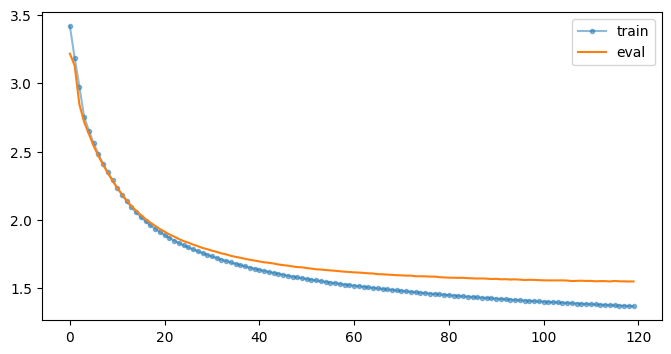

In [19]:
plt.rcParams['figure.figsize'] = (8, 4)
plt.plot(gen_pretrain_train_loss, marker='.', alpha=.5)
plt.plot(gen_pretrain_eval_loss)
plt.legend(['train', 'eval']);

In [20]:
len(gen_lines)

4096

In [21]:
gen_lines[:3]

['Code KRM An Effectivelice anterr',
 'Foulding a Model Trassical Price',
 'Dy Closolene Generalized Linear ']

<a name="disc_pretrain"></a>
### –ü—Ä–µ–¥–æ–±—É—á–µ–Ω–∏–µ –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞

–ë–∏–Ω–∞—Ä–Ω—ã–π –∫–ª–∞—Å—Å–∏—Ñ–∏–∫–∞—Ç–æ—Ä - —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω–∞—è –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—å –∏–ª–∏ —Ä–µ–∞–ª—å–Ω–∞—è

In [22]:
def train_discriminator(dis, data_iter, criterion, optimizer, epochs,
        dis_adversarial_train_loss, dis_adversarial_train_acc, cuda):
    """
    Train discriminator
    """
    for epoch in range(epochs):
        correct = 0
        total_loss = 0.
        for data, target in data_iter:
            if cuda:
                data, target = data.cuda(), target.cuda()
            target = target.contiguous().view(-1)
            output = dis(data)
            pred = output.data.max(1)[1]
            correct += pred.eq(target.data).cpu().sum()
            loss = criterion(output, target)
            total_loss += loss.item()
            optimizer.zero_grad()
            loss.backward()
            optimizer.step()
        data_iter.reset()
        avg_loss = total_loss / len(data_iter)
        acc = correct.item() / data_iter.data_num
        print("Epoch {}, train loss: {:.5f}, train acc: {:.3f}".format(epoch, avg_loss, acc))
        dis_adversarial_train_loss.append(avg_loss)
        dis_adversarial_train_acc.append(acc)

def eval_discriminator(model, data_iter, criterion, cuda):
    """
    Evaluate discriminator, dropout is enabled
    """
    correct = 0
    total_loss = 0.
    with torch.no_grad():
        for data, target in data_iter:
            if cuda:
                data, target = data.cuda(), target.cuda()
            target = target.contiguous().view(-1)
            output = model(data)
            pred = output.data.max(1)[1]
            correct += pred.eq(target.data).cpu().sum()
            loss = criterion(output, target)
            total_loss += loss.item()
        data_iter.reset()
    avg_loss = total_loss / len(data_iter)
    acc = correct.item() / data_iter.data_num
    return avg_loss, acc

In [23]:
disc_data_iter = DisDataIter(real_lines, gen_lines, args.batch_size, vocab, max_len)

In [24]:
d_embed_dim = 64
d_filter_sizes = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 15, 20]
d_num_filters = [100, 200, 200, 200, 200, 100, 100, 100, 100, 100, 160, 160]
d_dropout_prob = 0.2
discriminator = Discriminator(vocab_size, d_embed_dim, d_filter_sizes, d_num_filters, d_dropout_prob).to(device)
dis_optimizer = torch.optim.SGD(params=discriminator.parameters(), lr=args.dis_lr)

In [25]:
gen_lines = generate_samples(generator, args.batch_size, args.n_samples, inv_vocab, g_seq_len=max_len)

In [26]:
dis_adversarial_train_loss = []
dis_adversarial_train_acc = []
dis_pretrain_eval_loss = []
dis_pretrain_eval_acc = []

In [27]:
gen_val_lines = generate_samples(generator, args.batch_size, len(val_lines), inv_vocab, g_seq_len=max_len)
eval_iter = DisDataIter(val_lines, gen_val_lines, args.batch_size, vocab, max_len)
for i in range(args.d_pretrain_steps):
    t0 = time()
    print("D-Step {}".format(i))
    train_discriminator(discriminator, disc_data_iter, nll_loss,
        dis_optimizer, args.dk_epochs, dis_adversarial_train_loss, dis_adversarial_train_acc, cuda)
    dis_loss, dis_acc = eval_discriminator(discriminator, eval_iter, nll_loss, cuda)
    dis_pretrain_eval_loss.append(dis_loss)
    dis_pretrain_eval_acc.append(dis_acc)
    print("eval loss: {:.5f}, eval acc: {:.3f}, elapsed: {:.1f}s".format(dis_loss, dis_acc, time() - t0))

D-Step 0
Epoch 0, train loss: 0.70156, train acc: 0.517
Epoch 1, train loss: 0.70404, train acc: 0.513
eval loss: 0.70281, eval acc: 0.521, elapsed: 7.3s
D-Step 1
Epoch 0, train loss: 0.70307, train acc: 0.513
Epoch 1, train loss: 0.69686, train acc: 0.530
eval loss: 0.69294, eval acc: 0.552, elapsed: 3.7s
D-Step 2
Epoch 0, train loss: 0.69483, train acc: 0.536
Epoch 1, train loss: 0.69318, train acc: 0.536
eval loss: 0.68682, eval acc: 0.556, elapsed: 3.6s
D-Step 3
Epoch 0, train loss: 0.68932, train acc: 0.548
Epoch 1, train loss: 0.68713, train acc: 0.558
eval loss: 0.70153, eval acc: 0.526, elapsed: 3.7s
D-Step 4
Epoch 0, train loss: 0.68307, train acc: 0.554
Epoch 1, train loss: 0.67861, train acc: 0.567
eval loss: 0.68645, eval acc: 0.561, elapsed: 3.7s
D-Step 5
Epoch 0, train loss: 0.67778, train acc: 0.570
Epoch 1, train loss: 0.67706, train acc: 0.574
eval loss: 0.67800, eval acc: 0.563, elapsed: 3.7s
D-Step 6
Epoch 0, train loss: 0.67179, train acc: 0.585
Epoch 1, train loss:

<a name="adversarial_train"></a>
### –û–±—É—á–µ–Ω–∏–µ –≤ —Å–æ—Å—Ç—è–∑–∞—Ç–µ–ª—å–Ω–æ–º —Ä–µ–∂–∏–º–µ

Rollout - —Å–æ–¥–µ—Ä–∂–∏—Ç –º–µ—Ç–æ–¥, –∫–∞–∫ –º—ã –±—É–¥–µ–º –æ–ø—Ä–µ–¥–µ–ª—è—Ç—å –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏–µ –Ω–∞ –∫–∞–∂–¥–æ–º —à–∞–≥–µ (—Ç–æ–∫–µ–Ω–µ) –ø—Ä–∏ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Å –ø–æ–º–æ—â—å—é Monte Carlo –ø–æ–∏—Å–∫–∞. –ó–∞—Ç–µ–º –≤ PGLoss –ª–æ—Å—Å —Å—á–∏—Ç–∞–µ—Ç—Å—è –∫–∞–∫ -1 * –ª–æ–≥–∞—Ä–∏—Ñ–º –ø—Ä–µ–¥—Å–∫–∞–∑–∞–Ω–Ω–æ–π –≤–µ—Ä–æ—è—Ç–Ω–æ—Å—Ç–∏ –¥–ª—è –∏—Å—Ç–∏–Ω–Ω—ã—Ö —Ç–æ–∫–µ–Ω–æ–≤ * –≤–æ–∑–Ω–∞–≥—Ä–∞–∂–¥–µ–Ω–∏–µ.

In [28]:
import copy
class Rollout(object):
    """ Rollout Policy """

    def __init__(self, model, update_rate):
        self.ori_model = model
        self.own_model = copy.deepcopy(model)
        self.update_rate = update_rate

    def get_reward(self, x, num, discriminator):
        """
        Inputs: x, num, discriminator
            - x: (batch_size, seq_len) input data
            - num: rollout number
            - discriminator: discriminator model
        """
        rewards = []
        batch_size = x.size(0)
        seq_len = x.size(1)
        for i in range(num):
            # print(i, end=', ')
            for l in range(1, seq_len):
                data = x[:, 0:l]
                samples = self.own_model.sample(batch_size, seq_len, data)
                pred = discriminator(samples)
                pred = pred.cpu().data[:,1].numpy()
                if i == 0:
                    rewards.append(pred)
                else:
                    rewards[l-1] += pred

            # for the last token
            pred = discriminator(x)
            pred = pred.cpu().data[:, 1].numpy()
            if i == 0:
                rewards.append(pred)
            else:
                rewards[seq_len-1] += pred
        rewards = np.transpose(np.array(rewards)) / (1.0 * num) # batch_size * seq_len
        return rewards

    def update_params(self):
        dic = {}
        for name, param in self.ori_model.named_parameters():
            dic[name] = param.data
        for name, param in self.own_model.named_parameters():
            if name.startswith('emb'):
                param.data = dic[name]
            else:
                param.data = self.update_rate * param.data + (1 - self.update_rate) * dic[name]

In [29]:
class PGLoss(nn.Module):
    """
    Pseudo-loss that gives corresponding policy gradients (on calling .backward())
    for adversial training of Generator
    """

    def __init__(self):
        super(PGLoss, self).__init__()

    def forward(self, pred, target, reward):
        """
        Inputs: pred, target, reward
            - pred: (batch_size, seq_len),
            - target : (batch_size, seq_len),
            - reward : (batch_size, ), reward of each whole sentence
        """
        one_hot = torch.zeros(pred.size(), dtype=torch.bool)  # one hot for targets
        if pred.is_cuda:
            one_hot = one_hot.cuda()
        one_hot.scatter_(1, target.data.view(-1, 1), 1)  # set positions to 1
        loss = torch.masked_select(pred, one_hot)
        loss = loss * reward.contiguous().view(-1)
        loss = -torch.sum(loss)
        return loss

In [30]:
def adversarial_train(gen, dis, rollout, pg_loss, nll_loss, gen_optimizer, dis_optimizer,
        dis_adversarial_train_loss, dis_adversarial_train_acc, args, cuda, disc_data_iter):
    """
    Adversarially train generator and discriminator
    """
    # train generator for g_steps
    print("#Train generator")
    for i in range(args.g_steps):
        print("##G-Step {}".format(i))
        train_generator_PG(gen, dis, rollout, pg_loss, gen_optimizer, args.gk_epochs, args, cuda)

    # train discriminator for d_steps
    print("#Train discriminator")
    for i in range(args.d_steps):
        print("##D-Step {}".format(i))
        train_discriminator(dis, disc_data_iter, nll_loss, dis_optimizer, args.dk_epochs,
            dis_adversarial_train_loss, dis_adversarial_train_acc, cuda)

    # update roll-out model
    rollout.update_params()

def train_generator_PG(gen, dis, rollout, pg_loss, optimizer, epochs, args, cuda):
    """
    Train generator with the guidance of policy gradient
    """
    for epoch in range(epochs):
        # construct the input to the genrator, add zeros before samples and delete the last column
        samples = generator.sample(args.batch_size, g_seq_len)
        zeros = torch.zeros(args.batch_size, 1, dtype=torch.int64)
        if samples.is_cuda:
            zeros = zeros.cuda()
        inputs = torch.cat([zeros, samples.data], dim = 1)[:, :-1].contiguous()
        targets = samples.data.contiguous().view((-1,))

        # calculate the reward
        rewards = torch.tensor(rollout.get_reward(samples, args.n_rollout, dis))
        if cuda:
            rewards = rewards.cuda()

        # update generator
        output = gen(inputs)
        loss = pg_loss(output, targets, rewards)
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        print(f'Epoch {epoch}, PG loss: {loss.item():.4f}')

In [32]:
pg_loss = PGLoss()

gen_adversarial_eval_loss = []
dis_adversarial_eval_loss = []
dis_adversarial_eval_acc = []

In [33]:
g_seq_len = max_len

In [34]:
rollout = Rollout(generator, args.update_rate)
for i in range(args.rounds):
    print("Round {}".format(i))
    adversarial_train(generator, discriminator, rollout,
        pg_loss, nll_loss, gen_optimizer, dis_optimizer,
        dis_adversarial_train_loss, dis_adversarial_train_acc, args, cuda, disc_data_iter)
    gen_lines = generate_samples(generator, args.batch_size, args.n_samples, inv_vocab, g_seq_len=max_len)
    disc_data_iter = DisDataIter(real_lines, gen_lines, args.batch_size, vocab, max_len)  # gen_lines are new to discriminator
    gen_eval_iter = DataIterator(val_lines, vocab, max_len=max_len)
    gen_loss = eval_generator(generator, gen_eval_iter, nll_loss, cuda)
    gen_adversarial_eval_loss.append(gen_loss)
    dis_loss, dis_acc = eval_discriminator(discriminator, disc_data_iter, nll_loss, cuda)
    dis_adversarial_eval_loss.append(dis_loss)
    dis_adversarial_eval_acc.append(dis_acc)
    print(f"gen eval loss: {gen_loss:.5f}, dis eval loss: {dis_loss:.5f}, dis eval acc: {dis_acc:.3f}, elapsed: {time() - t0:.1f}s")

Round 0
#Train generator
##G-Step 0
Epoch 0, PG loss: -2256.6013
#Train discriminator
##D-Step 0
Epoch 0, train loss: 0.64876, train acc: 0.629
Epoch 1, train loss: 0.64626, train acc: 0.631
##D-Step 1
Epoch 0, train loss: 0.64516, train acc: 0.635
Epoch 1, train loss: 0.64113, train acc: 0.647
##D-Step 2
Epoch 0, train loss: 0.63524, train acc: 0.647
Epoch 1, train loss: 0.63386, train acc: 0.651
gen eval loss: 1.56917, dis eval loss: 0.63579, dis eval acc: 0.651, elapsed: 49.5s
Round 1
#Train generator
##G-Step 0
Epoch 0, PG loss: -2259.6516
#Train discriminator
##D-Step 0
Epoch 0, train loss: 0.63291, train acc: 0.653
Epoch 1, train loss: 0.61876, train acc: 0.675
##D-Step 1
Epoch 0, train loss: 0.62000, train acc: 0.666
Epoch 1, train loss: 0.60628, train acc: 0.700
##D-Step 2
Epoch 0, train loss: 0.60093, train acc: 0.703
Epoch 1, train loss: 0.59618, train acc: 0.699
gen eval loss: 1.58488, dis eval loss: 0.62110, dis eval acc: 0.643, elapsed: 74.3s
Round 2
#Train generator
##G-S

In [35]:
gen_lines[:3]

['MartideLewathrond Proveter porat',
 'Biand Extrondion and Acing Model',
 'A Rargeetion for thee Eystribum ']

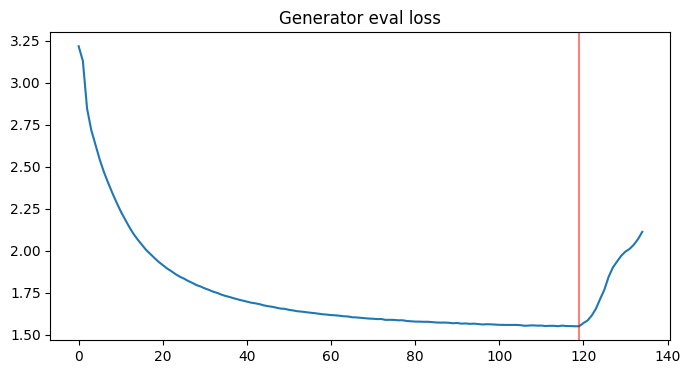

In [36]:
plt.plot(gen_pretrain_eval_loss + gen_adversarial_eval_loss)
plt.axvline(x=len(gen_pretrain_eval_loss)-1, color='r', alpha=.5)
plt.title('Generator eval loss');

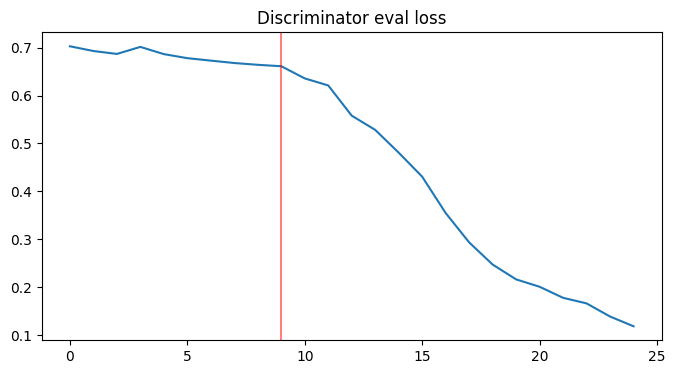

In [37]:
plt.plot(dis_pretrain_eval_loss + dis_adversarial_eval_loss)
plt.axvline(x=len(dis_pretrain_eval_loss)-1, color='r', alpha=.5)
plt.title('Discriminator eval loss');

–ö—Ä–∏–≤–∞—è —Ñ—É–Ω–∫—Ü–∏–∏ –ø–æ—Ç–µ—Ä—å –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞ –∑–¥–æ—Ä–æ–≤–æ–≥–æ —á–µ–ª–æ–≤–µ–∫–∞

<img src="https://raw.githubusercontent.com/sswt/dive2gai/main/.github/images/w4/seqgan_loss.png" alt="SeqGAN" width="60%" />

–≠—Ç–æ –∫–∞—Ä—Ç–∏–Ω–∫–∞ –∏–∑ —Å—Ç–∞—Ç—å–∏, –≤–æ–∑–º–æ–∂–Ω–æ –¥–µ–ª–æ –≤ —Ç–æ–º, —á—Ç–æ —Ç–∞–º –±—ã–ª–∞ –¥—Ä—É–≥–∞—è –ø–æ—Å—Ç–∞–Ω–æ–≤–∫–∞ –∑–∞–¥–∞—á–∏ - –≤ –∫–∞—á–µ—Å—Ç–≤–µ –∏—Å—Ç–∏–Ω–Ω—ã—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç–µ–π –∏—Å–ø–æ–ª—å–∑–æ–≤–∞–ª–∏—Å—å —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã–µ "–æ—Ä–∞–∫—É–ª–æ–º" (oracle) - —Å–ª—É—á–∞–π–Ω—ã–º –æ–±—Ä–∞–∑–æ–º –∏–Ω–∏—Ü–∏–∞–ª–∏–∑–∏—Ä–æ–≤–∞–Ω–Ω–æ–π LSTM-—Å–µ—Ç—å—é.

–ë—ã–ª –µ—â—ë —ç–∫—Å–ø–µ—Ä–∏–º–µ–Ω—Ç –ø–æ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ –ø–æ–¥–ø–∏—Å–µ–π –∫ –∏–∑–æ–±—Ä–∞–∂–µ–Ω–∏—è–º –∏–∑ –¥–∞—Ç–∞—Å–µ—Ç–∞ [COCO Image Captions Dataset]() –Ω–∞ –æ—Å–Ω–æ–≤–µ –≥–æ—Ç–æ–≤–æ–π —Ä–µ–∞–ª–∏–∑–∞—Ü–∏–∏ –∏–∑ —Ä–µ–ø–æ–∑–∏—Ç–æ—Ä–∏—è [TextGAN-PyTorch](https://github.com/williamSYSU/TextGAN-PyTorch). –û–Ω –ø–æ–∫–∞–∑–∞–ª, —á—Ç–æ –ª–æ—Å—Å –Ω–∞ —Ä–µ–∞–ª—å–Ω—ã—Ö –ø–æ—Å–ª–µ–¥–æ–≤–∞—Ç–µ–ª—å–Ω–æ—Å—Ç—è—Ö —Ç–æ–∂–µ –Ω–µ –ø–∞–¥–∞–µ—Ç –¥–ª—è –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞, –æ–Ω –ø–∞–¥–∞–µ—Ç —Ç–æ–ª—å–∫–æ –¥–ª—è —Å–≥–µ–Ω–µ—Ä–∏—Ä–æ–≤–∞–Ω–Ω—ã—Ö. –ù–∞ –Ω–∞—Å—Ç–æ—è—â–∏—Ö –¥–∞–Ω–Ω—ã—Ö –æ–Ω –Ω–µ–º–Ω–æ–≥–æ —Ä–∞—Å—Ç—ë—Ç, –Ω–æ –Ω–µ —Ç–∞–∫ —Å–∏–ª—å–Ω–æ, –∫–∞–∫ –≤ –Ω–æ—É—Ç–±—É–∫–µ –∏ –≤–∏–∑—É–∞–ª—å–Ω–æ –Ω–∞ –∫–∞—á–µ—Å—Ç–≤–µ –≥–µ–Ω–µ—Ä–∞—Ü–∏–∏ —Ç–µ–∫—Å—Ç–æ–≤ —ç—Ç–æ –Ω–µ —Å–∫–∞–∑—ã–≤–∞–µ—Ç—Å—è.

```
Pretrained by MLE:

BLEU-[2, 3, 4, 5] = [0.736, 0.505, 0.315, 0.195], NLL_gen = 0.7995, NLL_div = 0.8425, Self-BLEU-[2, 3, 4] = [0.902, 0.748, 0.554]

Generated: an airplane is flying low in the sky .

Adversarial training (epoch 0):

BLEU-[2, 3, 4, 5] = [0.725, 0.49, 0.305, 0.182], NLL_gen = 0.7989, NLL_div = 0.8195, Self-BLEU-[2, 3, 4] = [0.919, 0.771, 0.578]

Generated:  a white with an airport plane on the dashboard of a runway .

Adversarial training (epoch 99):

BLEU-[2, 3, 4, 5] = [0.771, 0.532, 0.313, 0.197], NLL_gen = 0.9851, NLL_div = 0.5379, Self-BLEU-[2, 3, 4] = [0.951, 0.871, 0.753]

Generated: a white toilet with a trash can .
```


–°–∫—Ä–∏–ø—Ç TextGAN –∞–¥–∞–ø—Ç–∏—Ä–æ–≤–∞–Ω–Ω—ã–π –ø–æ–¥ —Ç–µ–∫—É—â–∏–π –¥–∞—Ç–∞—Å–µ—Ç –Ω–∞—Ö–æ–¥–∏—Ç—Å—è [–∑–¥–µ—Å—å](https://github.com/sswt/dive2gai/blob/main/unit4/seqgan_textgan.py), —Ç–∞–º –ø—Ä–æ–±–ª–µ–º—É —Å –Ω–µ–º–Ω–æ–≥–æ —Ä–∞—Å—Ç—É—â–∏–º –ª–æ—Å—Å–æ–º —Ç–æ–∂–µ —Ä–µ—à–∏—Ç—å –Ω–µ —É–¥–∞–ª–æ—Å—å.

## –£–ø—Ä–∞–∂–Ω–µ–Ω–∏—è

* –ø–æ–ø—Ä–æ–±—É–π—Ç–µ –ø–æ–º–µ–Ω—è—Ç—å –ø–∞—Ä–∞–º–µ—Ç—Ä—ã –æ–±—É—á–µ–Ω–∏—è
  * batch_size
  * —á–∏—Å–ª–æ —à–∞–≥–æ–≤ –∏ —ç–ø–æ—Ö –æ–±—É—á–µ–Ω–∏—è –¥–∏—Å–∫—Ä–∏–º–∏–Ω–∞—Ç–æ—Ä–∞, –≥–µ–Ω–µ—Ä–∞—Ç–æ—Ä–∞
  * –¥—Ä—É–≥–∏–µ –ø–∞—Ä–∞–º–µ—Ç—Ä—ã
* –∑–∞—Å—Ç–∞–≤—å—Ç–µ —Å–æ—Å—Ç—è–∑–∞—Ç–µ–ª—å–Ω–æ–µ –æ–±—É—á–µ–Ω–∏–µ —Ä–∞–±–æ—Ç–∞—Ç—å üò∏